In [1]:
import pandas as pd
import numpy as np
import warnings
import math
from sklearn import linear_model
warnings.filterwarnings('ignore')

In [13]:
df_polytruth = pd.read_csv('poly_truth.tsv',sep='\t')
df_quantboot = pd.read_csv('quant_bootstraps.tsv',sep='\t')
#df_quantboot['ENST00000349363']
#print (df_polytruth[df_polytruth['transcript_id']=='ENST00000349363'])

# Calculating Transcript Deviation:

In [14]:
import numpy as np



#df_quantboot['ENST00000382369']

df_polytruth['mean']=0
df_polytruth['std']=0


df_new = df_polytruth
#df_new['transcript_id']

#for i in df_new.columns:
#    print i
#mean = df_quantboot[row].mean()
    #print df_new[df_new['transcript_id']==i]
    #print mean
    #df_polytruth['std']= np.std(df_quantboot[i])
    
    
df_new['mean']=0
df_new['std']=0
df_new['deviation']=0
for index,row in df_new.iterrows():
    #print row
    try:
        mean = df_quantboot[row['transcript_id']].mean()
   
        df_new.loc[df_new.transcript_id==row['transcript_id'],'mean']=mean
    
        std= np.std(df_quantboot[row['transcript_id']])
        df_new.loc[df_new.transcript_id==row['transcript_id'],'std']=std
    #print df_new['std']
        row['std']=std
        row['mean'] = mean
        if row['std']!=0:
        #print abs(row['count']-row['mean'])/row['std']
            df_new.loc[df_new.transcript_id==row['transcript_id'],'deviation']= abs(row['count']-row['mean'])/row['std']
    except:
        pass
    
#df_new.apply(test, axis=1)
#df_new
#df_new.sort_values()
df_new=df_new.sort_values('deviation', ascending=False)

df_faulty = df_new[df_new['deviation']>2]
    
df_good = df_new[df_new['deviation']<=2]

#df_new

In [15]:
df_quantsf = pd.read_csv("quant.sf",sep='\t')
df_faulty_prop=pd.DataFrame(columns=['Name','Length','EffectiveLength','TPM','NumReads','count','mean','std','deviation'])
df_good_prop=pd.DataFrame(columns=['Name','Length','EffectiveLength','TPM','NumReads','count','mean','std','deviation'])
df_combined = pd.DataFrame(columns=['Name','Length','EffectiveLength','TPM','NumReads','count','mean','std','deviation','faulty'])

for index,row in df_faulty.iterrows():
    df_faulty_prop = df_faulty_prop.append(df_quantsf[df_quantsf['Name']==row['transcript_id']])
    df_faulty_prop.loc[df_faulty_prop.Name==row['transcript_id'],'count']=row['count']
    df_faulty_prop.loc[df_faulty_prop.Name==row['transcript_id'],'mean']=row['mean']
    df_faulty_prop.loc[df_faulty_prop.Name==row['transcript_id'],'std']=row['std']
    df_faulty_prop.loc[df_faulty_prop.Name==row['transcript_id'],'deviation']=row['deviation']
    
    #for combined
    df_combined = df_combined.append(df_quantsf[df_quantsf['Name']==row['transcript_id']])
    df_combined.loc[df_combined.Name==row['transcript_id'],'count']=row['count']
    df_combined.loc[df_combined.Name==row['transcript_id'],'mean']=row['mean']
    df_combined.loc[df_combined.Name==row['transcript_id'],'std']=row['std']
    df_combined.loc[df_combined.Name==row['transcript_id'],'deviation']=row['deviation']
    df_combined.loc[df_combined.Name==row['transcript_id'],'faulty']=1
    #df_temp.loc[index]=df_quantsf[df_quantsf['Name']==row['transcript_id']]
for index,row in df_good.iterrows():
    df_good_prop = df_good_prop.append(df_quantsf[df_quantsf['Name']==row['transcript_id']])
    df_good_prop.loc[df_good_prop.Name==row['transcript_id'],'count']=row['count']
    df_good_prop.loc[df_good_prop.Name==row['transcript_id'],'mean']=row['mean']
    df_good_prop.loc[df_good_prop.Name==row['transcript_id'],'std']=row['std']
    df_good_prop.loc[df_good_prop.Name==row['transcript_id'],'deviation']=row['deviation']
    
    #for combined
    df_combined = df_combined.append(df_quantsf[df_quantsf['Name']==row['transcript_id']])
    df_combined.loc[df_combined.Name==row['transcript_id'],'count']=row['count']
    df_combined.loc[df_combined.Name==row['transcript_id'],'mean']=row['mean']
    df_combined.loc[df_combined.Name==row['transcript_id'],'std']=row['std']
    df_combined.loc[df_combined.Name==row['transcript_id'],'deviation']=row['deviation']
    df_combined.loc[df_combined.Name==row['transcript_id'],'faulty']=0
#df_quantsf[df_quantsf['Name']=='ENST00000342665']
#df_good_prop

df_good_prop.to_csv("good_prop.csv")

df_faulty_prop.to_csv("faulty_prop.csv")

df_combined.to_csv("combined_result.csv")
#df_combined

# Checking Correlation:

(17792, 10)


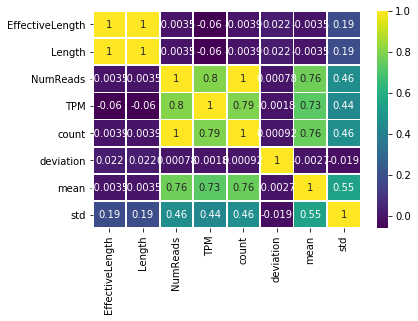

In [16]:
#df_faulty_cor = df_faulty_prop[['Length','deviation']].copy()
import seaborn as sns
import matplotlib.pyplot as plt
df_faulty_prop = pd.read_csv("faulty_prop.csv")
print (df_faulty_prop.shape)
df_faulty_cor = {'Length':df_faulty_prop['Length'],'deviation':df_faulty_prop['deviation'],'count':df_faulty_prop['count'], 'mean':df_faulty_prop['mean'],'std':df_faulty_prop['std'],'EffectiveLength':df_faulty_prop['EffectiveLength'],'TPM':df_faulty_prop['TPM'],'NumReads':df_faulty_prop['NumReads']}
df_faulty_cor = pd.DataFrame(df_faulty_cor).astype('float64')
#r = df_faulty_prop['deviation'].astype('float64').corr(df_faulty_prop['EffectiveLength'].astype('float64'))
#print r
r = df_faulty_cor.corr()
#print r
sns.heatmap(r, fmt=".2g", annot=True, cmap="viridis", linewidths=.8)
plt.show()

# Linear Regression:

In [17]:
df_res = pd.read_csv("combined_result.csv")
df_temp = {'EffectiveLength':df_res['EffectiveLength'], 'TPM':df_res['TPM'], 'faulty':df_res['faulty']}
df_temp = pd.DataFrame(df_temp)

X = {'EffectiveLength':df_temp['EffectiveLength'], 'TPM':df_temp['TPM']}
X = pd.DataFrame(X)
X = pd.DataFrame(X).values

#X = df_temp['deviation'].values[:,np.newaxis]
y =  df_res['faulty'].values

#length =  df_temp.count()
regr = linear_model.LinearRegression()
regr.fit(X,y)
print (regr.coef_)

#print df_res.shape

[  2.48549176e-05   7.93667107e-05]


# Scatter Plots

RELATION BETWEEN TPM AND DEVIATION FOR GOOD TRANSCRIPTS:

(9097, 10)


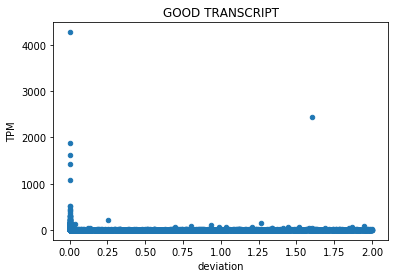

TPM          7917
deviation    7917
dtype: int64


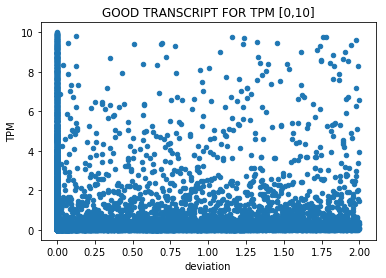

In [18]:
df_good_prop = pd.read_csv("good_prop.csv")
print (df_good_prop.shape)
df_temp = {'TPM':df_good_prop['TPM'],'deviation':df_good_prop['deviation']}
df_temp = pd.DataFrame(df_temp)

#df_temp = df_temp[df_temp['TPM']]
df_temp.plot(kind='scatter', x ='deviation', y ='TPM',title= 'GOOD TRANSCRIPT')
plt.show()

df_temp = df_temp[(df_temp['TPM']>=0) & (df_temp['TPM']<=10)]
print (df_temp.count())

df_temp.plot(kind='scatter', x ='deviation', y ='TPM',title= 'GOOD TRANSCRIPT FOR TPM [0,10]')
plt.show()

RELATION BETWEEN TPM AND DEVIATION FOR FAULTY TRANSCRIPTS:

(17792, 2)


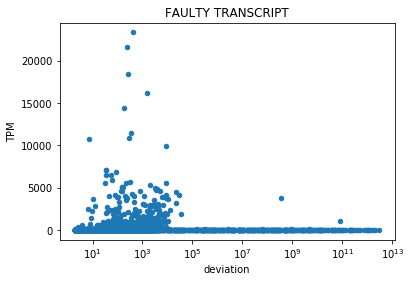

TPM          11140
deviation    11140
dtype: int64


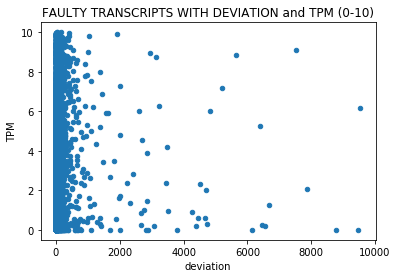

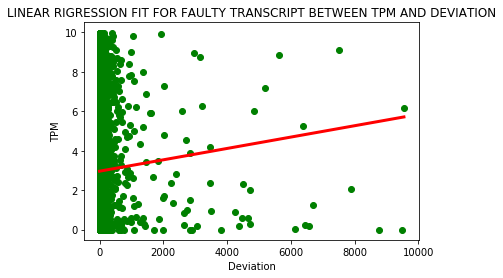

In [10]:

df_temp = {'TPM':df_faulty_prop['TPM'],'deviation':df_faulty_prop['deviation']}
df_temp = pd.DataFrame(df_temp)
print (df_temp.shape)
df_temp.plot(kind='scatter', x ='deviation', y ='TPM',logx=1, title='FAULTY TRANSCRIPT')
plt.show()

#df_temp['deviation'] = df_temp['deviation'].apply(np.log)
df_temp = df_temp[df_temp['deviation']<(10000)]
df_temp = df_temp[(df_temp['TPM']>=0) & (df_temp['TPM']<=10)]
print (df_temp.count())
df_temp.plot(kind='scatter', x ='deviation', y ='TPM', title='FAULTY TRANSCRIPTS WITH DEVIATION and TPM (0-10)')
#plt.ylim((500,8000))
plt.show()


X = df_temp['deviation'].values[:,np.newaxis]
y =  df_temp['TPM'].values
length =  df_temp.count()
regr = linear_model.LinearRegression()
regr.fit(X,y)
plt.scatter(X,y,  color='green')
plt.plot(X, regr.predict(X), color='red', linewidth=3)
plt.xlabel("Deviation")
plt.ylabel("TPM")
plt.title("LINEAR RIGRESSION FIT FOR FAULTY TRANSCRIPT BETWEEN TPM AND DEVIATION")
plt.show()

# Conclusion: For TPM>10, 84.9% of the Transcripts are faulty.

RELATION BETWEEN EFFECTIVE LENGTH AND DEVIATION FOR GOOD TRANSCRIPTS:

EffectiveLength    9097
deviation          9097
dtype: int64


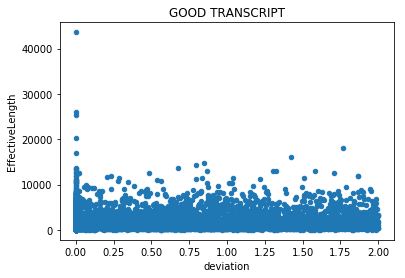

EffectiveLength    8540
deviation          8540
dtype: int64


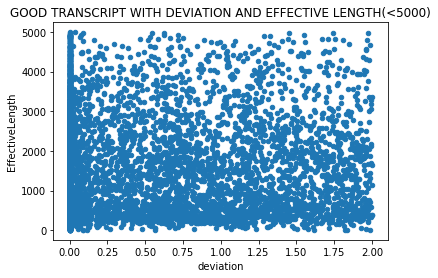

In [9]:
df_good_prop = pd.read_csv("good_prop.csv")
#print df_good_prop.shape
df_temp = {'EffectiveLength':df_good_prop['EffectiveLength'],'deviation':df_good_prop['deviation']}

df_temp = pd.DataFrame(df_temp)
#df_temp = df_temp[df_temp['EffectiveLength']<4000]
print (df_temp.count())
df_temp.plot(kind='scatter', x ='deviation', y ='EffectiveLength', title= 'GOOD TRANSCRIPT')
plt.show()

df_temp = df_temp[df_temp['EffectiveLength']<5000]
print (df_temp.count())
df_temp.plot(kind='scatter', x ='deviation', y ='EffectiveLength', title= 'GOOD TRANSCRIPT WITH DEVIATION AND EFFECTIVE LENGTH(<5000)')
plt.show()

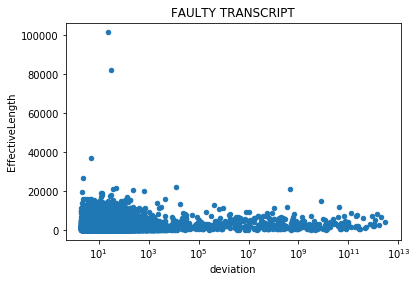

EffectiveLength    15986
deviation          15986
dtype: int64


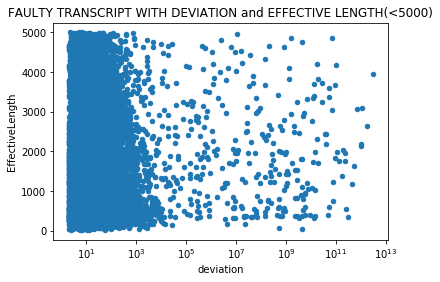

In [8]:
df_temp = {'EffectiveLength':df_faulty_prop['EffectiveLength'],'deviation':df_faulty_prop['deviation']}
df_temp = pd.DataFrame(df_temp)

df_temp.plot(kind='scatter', x ='deviation', y ='EffectiveLength',logx=1,title= 'FAULTY TRANSCRIPT')
plt.show()

df_temp = df_temp[df_temp['EffectiveLength']<5000]
#df_temp = df_temp[df_temp['deviation']<30]
print (df_temp.count())
df_temp.plot(kind='scatter', x ='deviation', y ='EffectiveLength',logx=1,title= 'FAULTY TRANSCRIPT WITH DEVIATION and EFFECTIVE LENGTH(<5000)')
plt.show()

# Conclusion: Transcripts with Effective length > 5000 are 76.4% faulty